# Analiza ofert pracy

### Importy i inicjalizacja obiektów

In [1]:
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets
import matplotlib as mpl
import seaborn as sns
import pandas as pd

from database import Database
from logger import Logger

In [2]:
sns.set_theme(style="whitegrid")

log_file = "app.log"
logger = Logger(log_file)

folder = "various_files/"

db_name = folder + "job_offers.db"
db_structure = folder + "database_structure.sql"
db = Database(logger, db_name, db_structure)

2024-12-28 12:57:23 [INFO]: The database from file various_files/database_structure.sql already exists!


In [3]:
# 1. Zmienne typu data
date_from_widget = widgets.Text(
    value='',
    placeholder='YYYY-MM-DD',
    description='Data od:',
    disabled=False
)
date_to_widget = widgets.Text(
    value='',
    placeholder='YYYY-MM-DD',
    description='Data do:',
    disabled=False
)

# 2. Wielokrotny wybór kategorii
all_categories = db.get_unique_categories()
categories_widget = widgets.SelectMultiple(
    options=all_categories,
    description='Category:',
    disabled=False
)

# 3. Wielokrotny wybór lokalizacji
all_locations = db.get_unique_locations()
locations_widget = widgets.SelectMultiple(
    options=all_locations,
    description='Location:',
    disabled=False
)

# 4. Wielokrotny wybór stanowiska
all_positions = db.get_unique_positions()
positions_widget = widgets.SelectMultiple(
    options=all_positions,
    description='Position:',
    disabled=False
)

# 5. Wielokrotny wybór doświadczenia
all_experiences = db.get_unique_experiences()
experience_widget = widgets.SelectMultiple(
    options=all_experiences,
    description='Experience:',
    disabled=False
)

# 6. Wielokrotny wybór trybu pracy
all_modes = db.get_unique_operating_modes()
operating_mode_widget = widgets.SelectMultiple(
    options=all_modes,
    description='Mode:',
    disabled=False
)

In [4]:
# Przyciski i akcja pobrania danych
button = widgets.Button(description="Pobierz dane")

def on_button_clicked(b):
    # Odpalamy filtr z wartości widgetów
    date_from_val = date_from_widget.value
    date_to_val = date_to_widget.value
    categories_val = list(categories_widget.value) if categories_widget.value else None
    locations_val = list(locations_widget.value) if locations_widget.value else None
    positions_val = list(positions_widget.value) if positions_widget.value else None
    experience_val = list(experience_widget.value) if experience_widget.value else None
    operating_mode_val = list(operating_mode_widget.value) if operating_mode_widget.value else None
    
    db.fill_temp_table_with_filters(
        date_from=date_from_val,
        date_to=date_to_val,
        categories=categories_val,
        locations=locations_val,
        positions=positions_val,
        experiences=experience_val,
        operating_modes=operating_mode_val
    )
    
    display(df_filtered.head(20))  # wyświetlamy przykładowe 20 wierszy

button.on_click(on_button_clicked)

# Wyświetlamy wszystkie widgety
display(date_from_widget)
display(date_to_widget)
display(categories_widget)
display(locations_widget)
display(positions_widget)
display(experience_widget)
display(operating_mode_widget)
button

Text(value='', description='Data od:', placeholder='YYYY-MM-DD')

Text(value='', description='Data do:', placeholder='YYYY-MM-DD')

SelectMultiple(description='Category:', options=('admin', 'ai/ml', 'analytics', 'architecture', 'c', 'data', '…

SelectMultiple(description='Location:', options=("'s-hertogenbosch", '00-519 warszawa', '8 sandridge park', '9…

SelectMultiple(description='Position:', options=(), value=())

SelectMultiple(description='Experience:', options=('c-level', 'junior', 'mid', 'senior'), value=())

SelectMultiple(description='Mode:', options=('hybrid', 'office', 'partly_remote', 'remote'), value=())

Button(description='Pobierz dane', style=ButtonStyle())

### 1. Oferty według najpopularniejszych lokalizacji

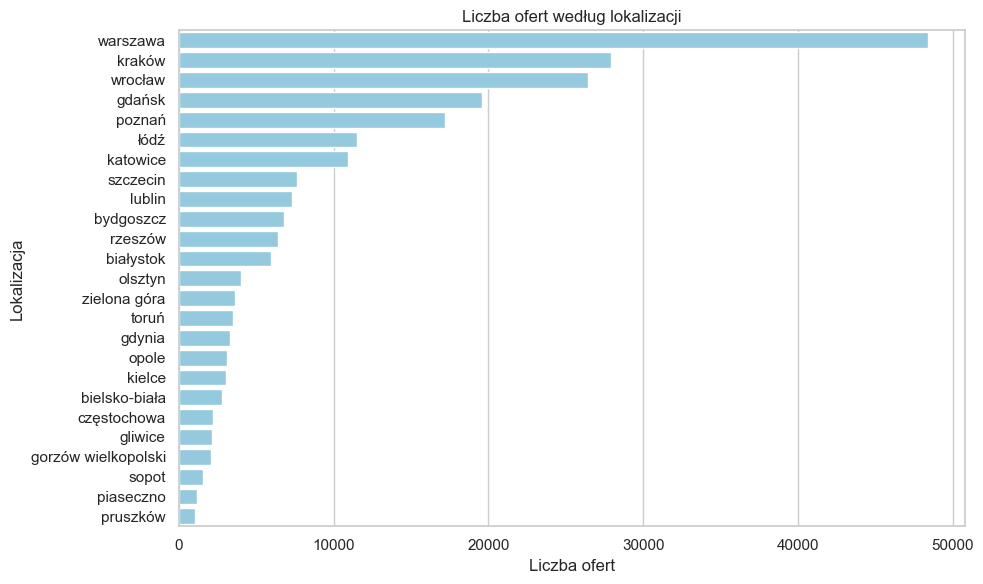

In [5]:
ilosc_lokalizacji = 25

df_location = db.get_offers_by_location().head(n=ilosc_lokalizacji)

plt.figure(figsize=(10,6))
sns.barplot(x="total_offers", y="location", data=df_location, color="skyblue")
plt.title("Liczba ofert według lokalizacji")
plt.xlabel("Liczba ofert")
plt.ylabel("Lokalizacja")
plt.tight_layout()
plt.show()

### 2. Oferty według doświadczenia

,experience,total_offers
0,mid,133048
1,senior,112552
2,junior,11652


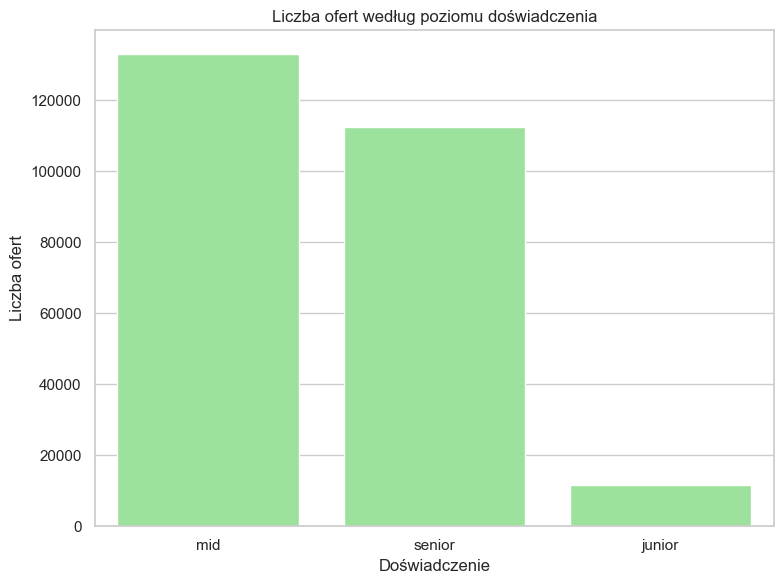

In [6]:
df_experience = db.get_offers_by_experience()
display(df_experience)

plt.figure(figsize=(8,6))
sns.barplot(x="experience", y="total_offers", data=df_experience, color="lightgreen")
plt.title("Liczba ofert według poziomu doświadczenia")
plt.xlabel("Doświadczenie")
plt.ylabel("Liczba ofert")
plt.tight_layout()
plt.show()

### 3. Średnie widełki płacowe (B2B i Permanent) wg doświadczenia i waluty

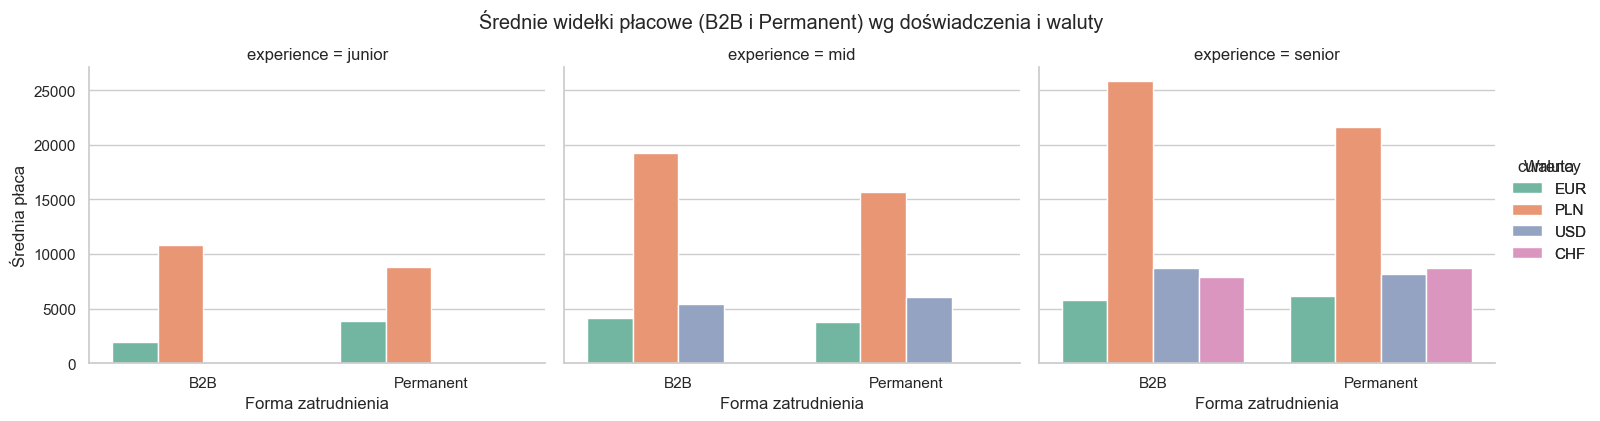

In [7]:
# Przygotowanie danych - załóżmy, że df_salaries jest DataFrame z danymi
# i df_melted jest DataFrame po transformacji z poprzednich przykładów.
# Jeśli df_melted jest już utworzony, możesz pominąć poniższy kod przygotowawczy.

# Przykładowy kod tworzący df_melted w razie potrzeby (dostosuj do swojej sytuacji):
df_salaries = db.get_avg_salary_by_experience_and_currency()

df_melted = df_salaries.melt(
    id_vars=["experience", "currency"], 
    value_vars=["avg_b2b_salary", "avg_permanent_salary"], 
    var_name="type", 
    value_name="salary"
)

# Zamiana nazw type na bardziej czytelne
df_melted['type'] = df_melted['type'].replace({
    'avg_b2b_salary': 'B2B', 
    'avg_permanent_salary': 'Permanent'
})

sns.set_theme(style="whitegrid")

g = sns.catplot(
    x='type', 
    y='salary', 
    hue='currency', 
    col='experience',
    data=df_melted, 
    kind='bar', 
    palette='Set2', 
    height=4, 
    aspect=1.2
)

g.fig.suptitle("Średnie widełki płacowe (B2B i Permanent) wg doświadczenia i waluty", y=1.05)
g.set_axis_labels("Forma zatrudnienia", "Średnia płaca")
g.add_legend(title="Waluta")

plt.show()

### 4. Rozkład ofert w czasie (year-month)

,year_month,total_offers
0,2023-01,27375
1,2023-02,27735
2,2023-03,29717
3,2023-04,20101
4,2023-05,30531


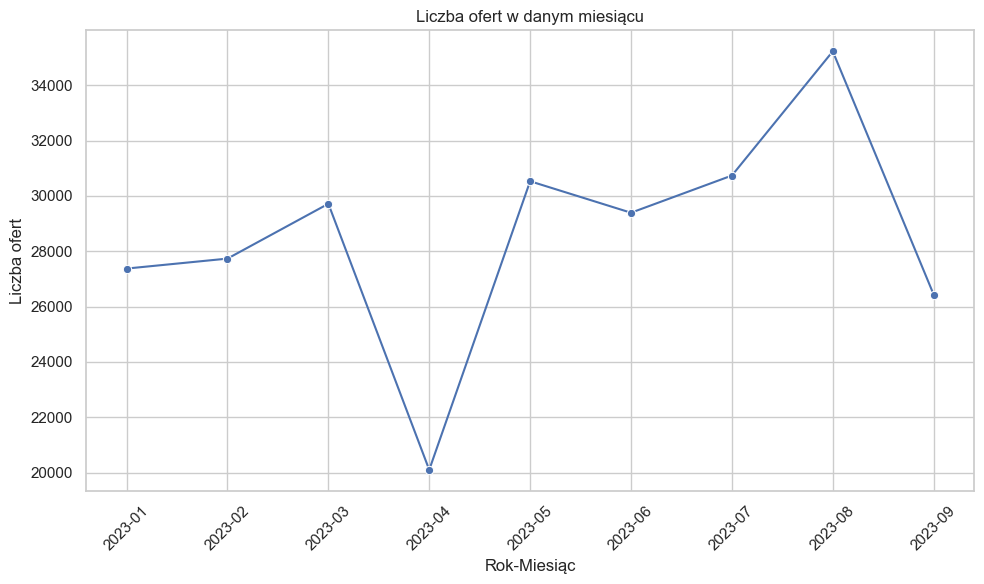

In [8]:
df_year_month = db.get_offers_by_year_month()
display(df_year_month.head())

plt.figure(figsize=(10,6))
sns.lineplot(x="year_month", y="total_offers", data=df_year_month, marker="o")
plt.title("Liczba ofert w danym miesiącu")
plt.xlabel("Rok-Miesiąc")
plt.ylabel("Liczba ofert")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5. Oferty według trybu pracy (operating_mode)

,operating_mode,total_offers
0,remote,187762
1,partly_remote,65761
2,office,3729


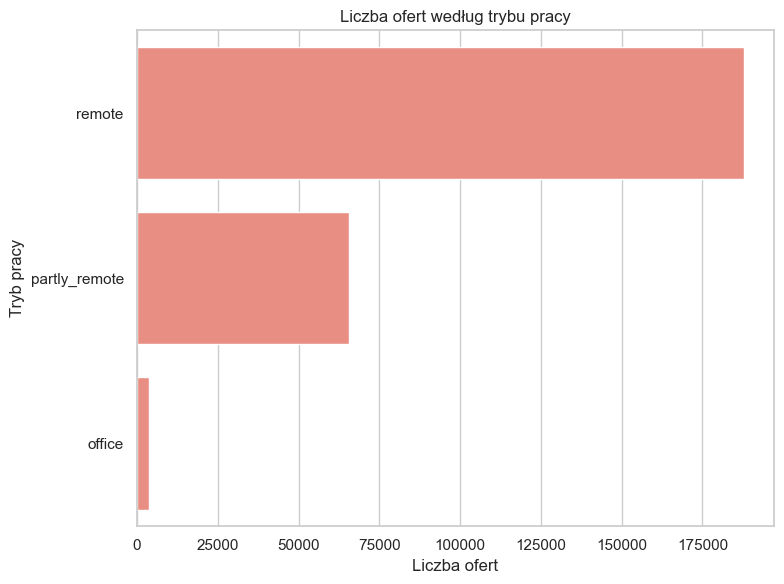

In [9]:
df_mode = db.get_offers_by_operating_mode()
display(df_mode.head())

plt.figure(figsize=(8,6))
sns.barplot(x="total_offers", y="operating_mode", data=df_mode, color="salmon")
plt.title("Liczba ofert według trybu pracy")
plt.xlabel("Liczba ofert")
plt.ylabel("Tryb pracy")
plt.tight_layout()
plt.show()

### 6. Najpopularniejsze technologie

In [10]:
"""
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Zakładamy, że mamy już obiekt db klasy Database
df_tech_levels = db.get_technology_with_levels()
display(df_tech_levels.head(10))

# Dodajemy kolumnę z łączną popularnością technologii,
# by później posortować słupki wg sumy total_offers per technologia
df_tech_levels['tech_total'] = df_tech_levels.groupby('technology')['total_offers'].transform('sum')

# Sortujemy wg łącznej popularności (descending)
df_tech_levels.sort_values(by='tech_total', ascending=False, inplace=True)

sns.set_theme(style="whitegrid")

# Możemy użyć catplot dla pogrupowanego wykresu
g = sns.catplot(
    x="technology", 
    y="total_offers", 
    hue="skill_level",
    data=df_tech_levels,
    kind="bar",
    height=6, aspect=2,  # większy wykres
    palette="Set2"
)
g.set_xticklabels(rotation=45, horizontalalignment='right')
g.set_axis_labels("Technologia", "Liczba ofert")
g._legend.set_title("Poziom umiejętności")
g.fig.suptitle("Najpopularniejsze technologie i wymagane poziomy", y=1.02)
plt.show()
"""

'\nimport pandas as pd\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Zakładamy, że mamy już obiekt db klasy Database\ndf_tech_levels = db.get_technology_with_levels()\ndisplay(df_tech_levels.head(10))\n\n# Dodajemy kolumnę z łączną popularnością technologii,\n# by później posortować słupki wg sumy total_offers per technologia\ndf_tech_levels[\'tech_total\'] = df_tech_levels.groupby(\'technology\')[\'total_offers\'].transform(\'sum\')\n\n# Sortujemy wg łącznej popularności (descending)\ndf_tech_levels.sort_values(by=\'tech_total\', ascending=False, inplace=True)\n\nsns.set_theme(style="whitegrid")\n\n# Możemy użyć catplot dla pogrupowanego wykresu\ng = sns.catplot(\n    x="technology", \n    y="total_offers", \n    hue="skill_level",\n    data=df_tech_levels,\n    kind="bar",\n    height=6, aspect=2,  # większy wykres\n    palette="Set2"\n)\ng.set_xticklabels(rotation=45, horizontalalignment=\'right\')\ng.set_axis_labels("Technologia", "Liczba ofert")\ng._legend.set_title

,technology,skill_level,total_offers,total_for_tech
0,SQL,4,44725,92361
1,SQL,3,34124,92361
2,SQL,2,6284,92361
3,SQL,5,5792,92361
4,SQL,1,1436,92361
5,Python,4,33399,63444
6,Python,3,21471,63444
7,Python,5,5395,63444
8,Python,2,1991,63444
9,Python,1,1188,63444


C:\Users\pczub\AppData\Local\Temp\ipykernel_10864\842316730.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


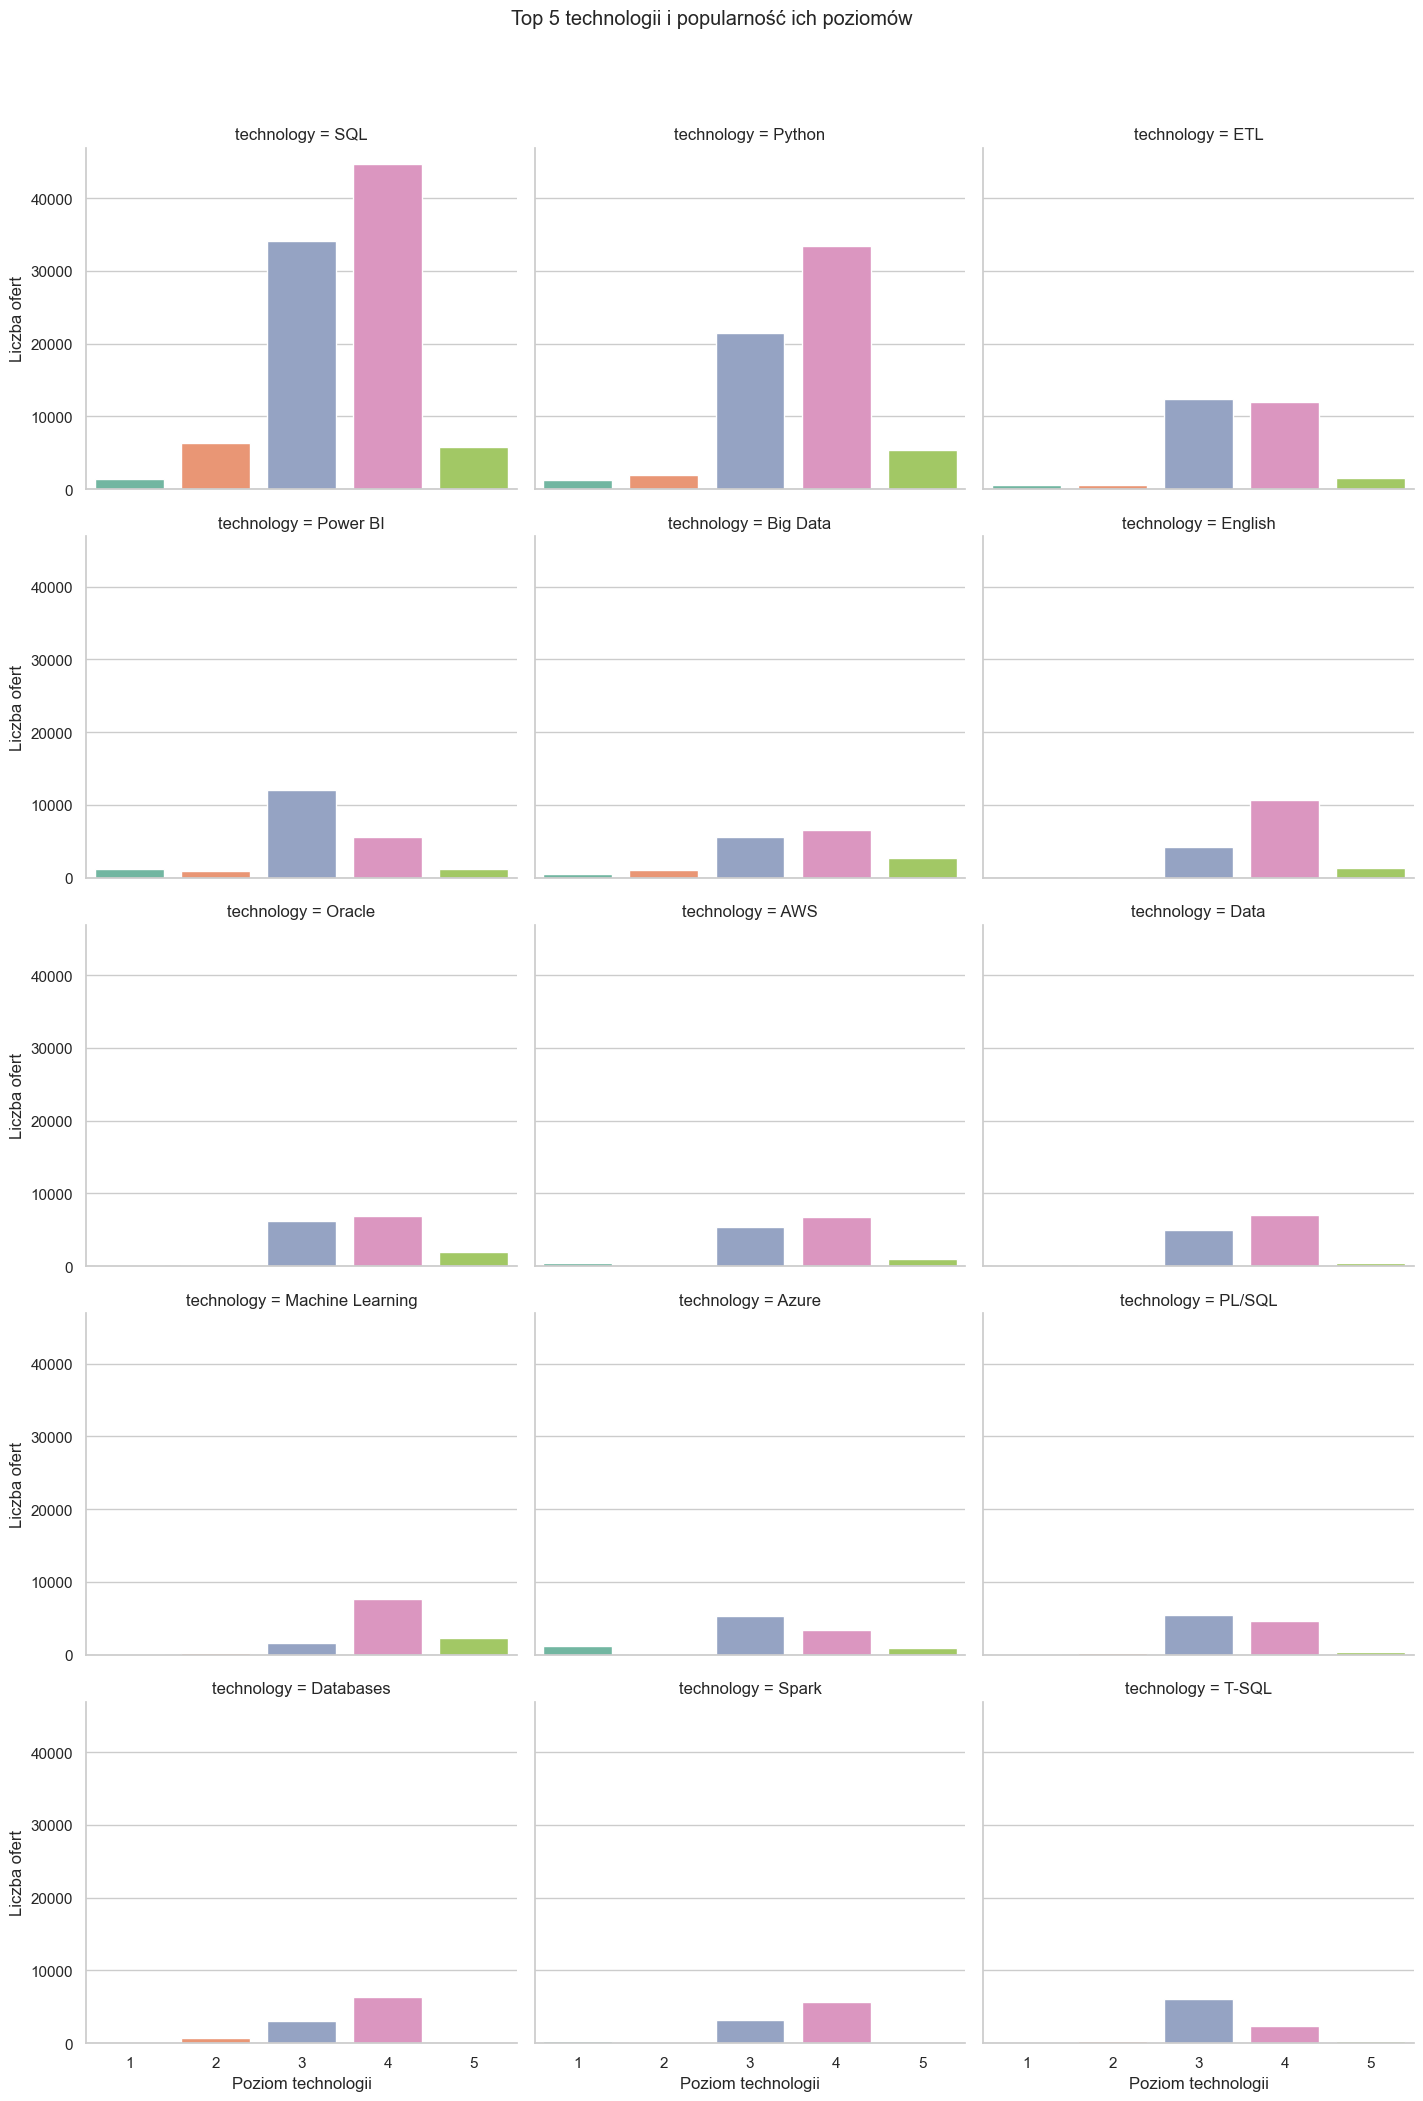

In [11]:
df_tech_sorted = db.get_technology_with_levels_sorted()

# Podglądamy dane
display(df_tech_sorted.head(20))

sns.set_theme(style="whitegrid")

# Załóżmy, że mamy w sumie kilkanaście technologii, 
# inaczej wykres stanie się nieczytelny. Możemy ograniczyć do top 5-10 technologii.
# Najpierw posortujemy i pobierzemy top 5 technologii (po total_for_tech).
top_techs = df_tech_sorted.drop_duplicates(subset=["technology"])\
                          .head(15)["technology"]

df_top = df_tech_sorted[df_tech_sorted["technology"].isin(top_techs)]

# Wykres: catplot z kolumnami = technology, oś X = skill_level, oś Y = total_offers
g = sns.catplot(
    x="skill_level",
    y="total_offers",
    col="technology",
    data=df_top,
    kind="bar",
    col_wrap=3,
    height=4, aspect=1.2,
    palette="Set2"
)
g.set_axis_labels("Poziom technologii", "Liczba ofert")
g.fig.suptitle("Top 5 technologii i popularność ich poziomów", y=1.05)
plt.show()